# Modelo Auto Regressivo Média Móvel

Utilizando modelo ARMA para modelar a série temporal

Utilizaremos uma série temporal do número de passageiros de uma linha de trem

* Importando biblitecas

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
import warnings
warnings.filterwarnings('ignore')

* Lendo arquivo CSV

In [61]:
dados = pd.read_csv('Passageiros.csv')

Exibindo cinco primeiras linhas

In [62]:
dados.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


* Removendo coluna ID

In [63]:
dados = dados.drop('ID',axis=1)

* Definindo data como índice

In [64]:
dados['Datetime'] = pd.to_datetime(dados['Datetime'])
dados = dados.set_index('Datetime')

* Número de passageiros diário

In [65]:
dados =  dados.resample('D').sum()
dados= dados.dropna()

* Graficando série temporal

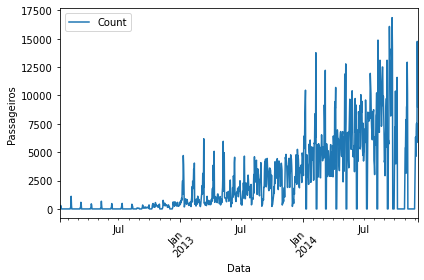

In [66]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.tight_layout()

In [67]:
t_treino = dados[dados.index<'2014-06-01'].index.values
t_teste = dados[dados.index>='2014-06-01'].index.values
X_treino = dados[dados.index<'2014-06-01'].values
X_teste = dados[dados.index>='2014-06-01'].values

* Aplicando modelo autoregressivo

In [68]:
from statsmodels.tsa.api import ARMA

In [69]:
modelo = ARMA(X_treino, order=(1, 2))
resultado = modelo.fit()

* Coeficientes

In [70]:
print('Coefficients: %s' % resultado.params)

Coefficients: [ 1.70028492e+03  9.99663689e-01 -5.78108669e-01 -3.58009544e-01]


* Fazendo predições

In [71]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

* Calculando erros

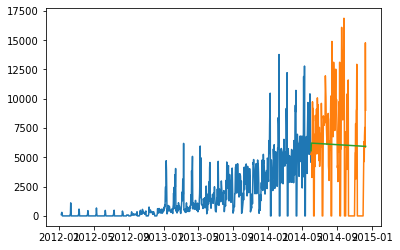

In [72]:
plt.plot(t_treino,X_treino,label='Treino')
plt.plot(t_teste,X_teste,label='Teste')
plt.plot(t_teste,X_pred,label='Predito')
plt.legend()

* Calculando erros

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
MSE = mean_squared_error(X_teste,X_pred)

In [75]:
RMSE = np.sqrt(MSE)

In [76]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 4454.85


* Grid Search

In [78]:
for i in range(1,20):
    for j in range(0,2):
        modelo = ARMA(X_treino, order=(i, j))
        resultado = modelo.fit()
        AIC = resultado.aic
        X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)
        MSE = mean_squared_error(X_teste,X_pred)
        RMSE = np.sqrt(MSE)
        print("i = {} j = {} AIC = {:0.2f} RMSE = {:0.2f}".format(i,j,AIC,RMSE))

i = 1 j = 0 AIC = 15130.64 RMSE = 5810.35
i = 1 j = 1 AIC = 15089.22 RMSE = 5698.81
i = 2 j = 0 AIC = 15105.63 RMSE = 5780.20
i = 2 j = 1 AIC = 14973.94 RMSE = 4474.38
i = 3 j = 0 AIC = 15093.62 RMSE = 5748.35
i = 3 j = 1 AIC = 14975.37 RMSE = 4478.76
i = 4 j = 0 AIC = 15085.09 RMSE = 5700.97
i = 4 j = 1 AIC = 14972.36 RMSE = 4485.77
i = 5 j = 0 AIC = 15059.01 RMSE = 5578.70
i = 5 j = 1 AIC = 14969.78 RMSE = 4492.72
i = 6 j = 0 AIC = 15042.46 RMSE = 5373.82
i = 6 j = 1 AIC = 14969.75 RMSE = 4489.01
i = 7 j = 0 AIC = 15017.53 RMSE = 5104.09
i = 7 j = 1 AIC = 14964.32 RMSE = 4447.86
i = 8 j = 0 AIC = 15017.01 RMSE = 5087.37
i = 8 j = 1 AIC = 14972.65 RMSE = 4487.95
i = 9 j = 0 AIC = 15016.35 RMSE = 4975.03
i = 9 j = 1 AIC = 14970.65 RMSE = 4489.79
i = 10 j = 0 AIC = 15017.43 RMSE = 4905.29
i = 10 j = 1 AIC = 14963.24 RMSE = 4454.01
i = 11 j = 0 AIC = 15014.06 RMSE = 4737.84
i = 11 j = 1 AIC = 14968.41 RMSE = 4503.33
i = 12 j = 0 AIC = 15009.37 RMSE = 4440.23
i = 12 j = 1 AIC = 14968.72 R

* Melhor modelo tem indices 

* Aplicando melhor modelo

In [82]:
modelo = ARMA(X_treino, order=(18, 0))
resultado = modelo.fit()
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

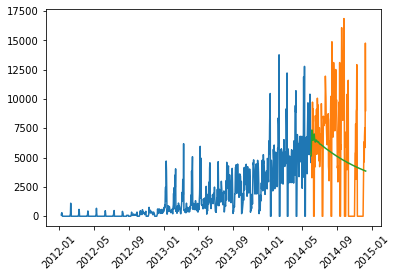

In [85]:
plt.plot(t_treino,X_treino,label='Treino');
plt.plot(t_teste,X_teste,label='Teste');
plt.plot(t_teste,X_pred,label='Predito');
plt.xticks(rotation=45);